In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
df=pd.read_csv('/aiffel/data/trip.csv')
df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [4]:
df.info() #fare_amount: 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [5]:
df.describe() #fare_amount 이상치 가능성 O

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [6]:
df.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [7]:
#1. 결측치 제거
# 22701 중 22698는 제거해도 큰 영향이 없을 것이라 판단함
df.dropna()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


<AxesSubplot:ylabel='passenger_count'>

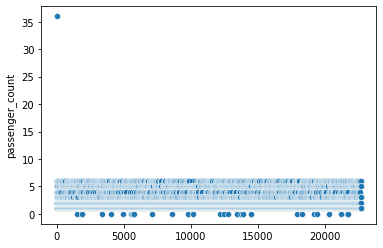

In [9]:
#2. 이상치 판단
sns.scatterplot(x=df.index, y=df['passenger_count']) #35

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='passenger_count'>

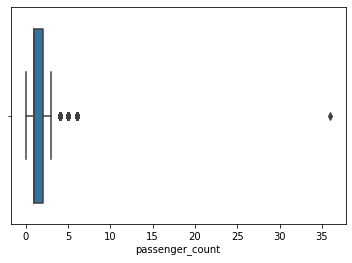

In [14]:
sns.boxplot(df['passenger_count'])

<AxesSubplot:ylabel='trip_distance'>

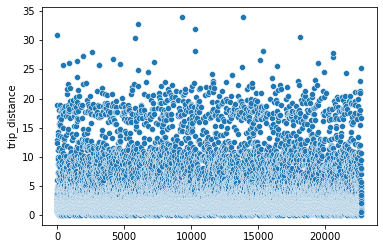

In [10]:
sns.scatterplot(x=df.index, y=df['trip_distance'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_distance'>

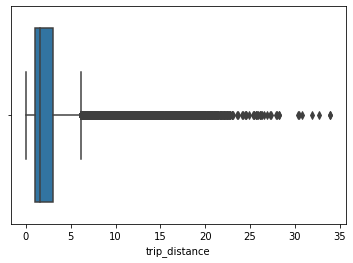

In [15]:
sns.boxplot(df['trip_distance'])

<AxesSubplot:ylabel='fare_amount'>

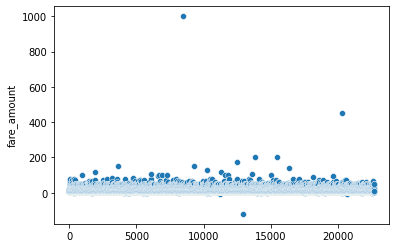

In [11]:
sns.scatterplot(x=df.index, y=df['fare_amount']) #3개 의심

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_amount'>

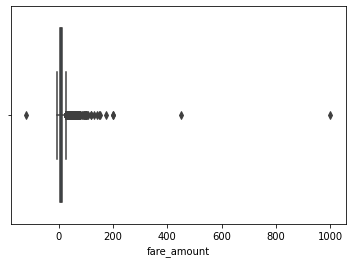

In [16]:
sns.boxplot(df['fare_amount'])

<AxesSubplot:ylabel='tip_amount'>

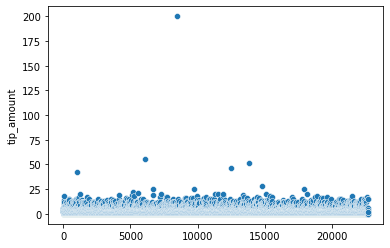

In [12]:
sns.scatterplot(x=df.index, y=df['tip_amount'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tip_amount'>

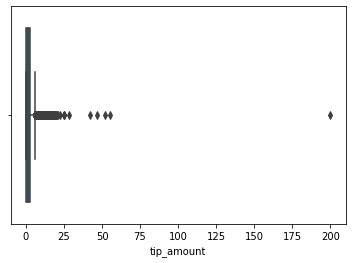

In [75]:
sns.boxplot(df['tip_amount'])

<AxesSubplot:ylabel='tolls_amount'>

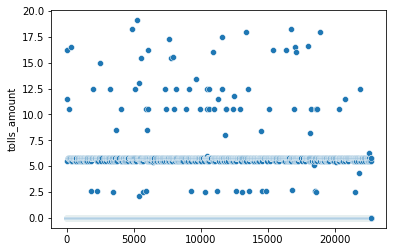

In [76]:
sns.scatterplot(x=df.index, y=df['tolls_amount'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tolls_amount'>

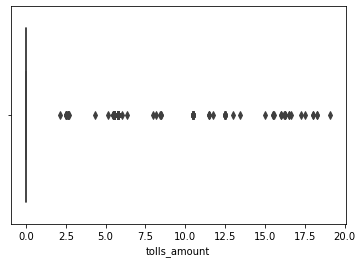

In [77]:
sns.boxplot(df['tolls_amount'])

In [78]:
#df['passenger_count'], df['fare_amount'], df['tip_amount']의 경우 이상치가 존재한다고 판단함

#나머지 변수의 경우, 이상치라고 판단하기 어려움

In [79]:
print(df['passenger_count'].value_counts())
#df['passenger_count']의 경우, 36 는 이상치에 해당한다
#택시 데이터라는 점을 감안하여 승객이 0명인 데이터 또한 제거하도록 판단함

1     16119
2      3305
5      1143
3       953
6       692
4       455
0        33
36        1
Name: passenger_count, dtype: int64


In [80]:
df1 = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 10)]

In [81]:
df1['fare_amount'].sort_values()

12946   -120.00
11206     -4.50
20700     -4.50
14716     -4.00
17604     -4.00
          ...  
20314    450.00
8478     999.99
52          NaN
189         NaN
244         NaN
Name: fare_amount, Length: 22667, dtype: float64

In [82]:
nan_count = df1['fare_amount'].isna().sum()
print(nan_count)
#매우 큰 값, 음수값, NaN는 전체 데이터에 비해 수가 적기 때문에 제거

3


In [83]:
df2 = df1[(df1['fare_amount'] > 0) & (df1['fare_amount'] < 390)].dropna(subset=['fare_amount'])
df2

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Card,1,2.36,10.5,1.70,0.00


In [84]:
print(df['tip_amount'].value_counts())
#아주 팁을 많이 주는 경우는 제외하고 데이터 포함

0.00      8058
1.00      1451
2.00       756
1.50       303
3.00       237
          ... 
10.21        1
200.00       1
0.25         1
11.41        1
14.84        1
Name: tip_amount, Length: 742, dtype: int64


In [85]:
df3 = df2[(df2['tip_amount'] >= 0) & (df2['tip_amount'] < 100)]
df3 = df3.dropna(subset=['tip_amount'])
df3

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Card,1,2.36,10.5,1.70,0.00


In [86]:
#3. card 명칭 통일
df3['payment_method'] = df3['payment_method'].replace({'Credit Card': 'Card', 'Debit Card': 'Card'})

In [87]:
#분석
df3['tpep_pickup_datetime'] = pd.to_datetime(df3['tpep_pickup_datetime'])
df3['pickup_hour'] = df3['tpep_pickup_datetime'].dt.hour
df3['pickup_day'] = df3['tpep_pickup_datetime'].dt.day_name()

print(df3[['tpep_pickup_datetime', 'pickup_hour', 'pickup_day']].head())

  tpep_pickup_datetime  pickup_hour pickup_day
0  2017-03-25 08:55:43            8   Saturday
1  2017-04-11 14:53:28           14    Tuesday
2  2017-12-15 07:26:56            7     Friday
3  2017-05-07 13:17:59           13     Sunday
4  2017-04-15 23:32:20           23   Saturday


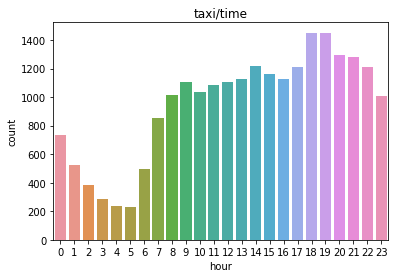

In [88]:
#분석 1. 하루 중 어느 시간대가 가장 바쁜가
sns.countplot(x='pickup_hour', data=df3)
plt.title('taxi/time')
plt.xlabel('hour')
plt.ylabel('count')
plt.show()

#가장 저조한 시각: 04~05시
#가장 피크인 시각: 19~20시
#출근길인 08시보다 심야인 23시의 이용량이 더 많다

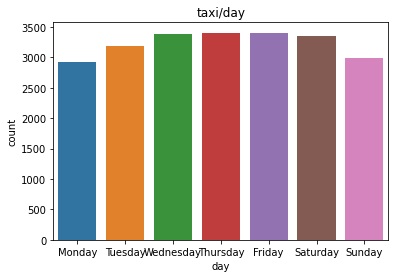

In [89]:
#분석 2. 어느 요일이 택시 이용이 많은가
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='pickup_day', data=df3, order=day_order)
plt.title('taxi/day')
plt.xlabel('day')
plt.ylabel('count')
plt.show()

#수, 목, 금이 가장 활발하다
#월, 일이 가장 저조하다

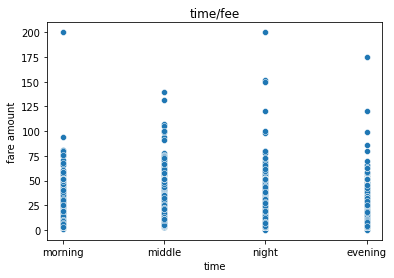

In [90]:
#분석 3. 출퇴근 시간에는 택시 요금이 비싸지는가
# 시간대를 구분하는 함수 정의
def num3(hour):
    if 5 <= hour < 10:
        return 'morning'
    elif 10 <= hour < 17:
        return 'middle'
    elif 17 <= hour < 20:
        return 'evening'
    else:
        return 'night'

df3['time_of_day'] = df3['pickup_hour'].apply(num3)

time_order = ['morning', 'middle', 'evening', 'night']
sns.scatterplot(x='time_of_day', y='fare_amount', data=df3)
plt.title('time/fee')
plt.xlabel('time')
plt.ylabel('fare amount')
plt.show()


#분석 1과 연관지었을때 오후, 심야 시간에는 이용량이 많아 이용료가 적다
#수요가 많으면서 공급도 많기 때문에.. 

#아침 시간대의 경우, 수요도 적고 공급도 적다
#그래서 금액이 높은 편 일것이라 추측

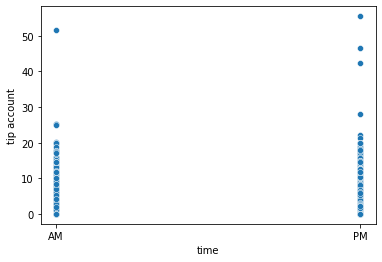

In [91]:
#분석 4. 오전/오후 중 팁이 언제 더 많은가
df3['time'] = np.where(df3['pickup_hour'] < 12, 'AM', 'PM')

sns.scatterplot(x='time', y='tip_amount', data=df3)
plt.xlabel('time')
plt.ylabel('tip account')
plt.show()

#비교적 저녁 시간에 팁이 더 고점으로 간다

In [92]:
#분석 5. 변수 간 상관관계
corr_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'passenger_count']
correlation_matrix = df3[corr_cols].corr()
print(correlation_matrix)

#강한 양의 상관관계
    #trip_distance, fare_amount: 주행거리가 길어지면 요금도 높아진다
    #tip_amount, fare_amount: 요금이 높을수록 팁도 높아진다
    #tolls_amount, trip_distance: 주행거리가 길어지면 톨게이트비용도 높아진다
#강한 음의 상관관계
    #passenger_count, tip_amount: 승객수와 팁은 관계가 거의 없다
        #또한 승객 수는 다른 변수들과도 상관관계가 대부분 낮다
        #다른 변수와의 상관관계가 거의 없다

                 trip_distance  fare_amount  tip_amount  tolls_amount  \
trip_distance         1.000000     0.905527    0.569072      0.622314   
fare_amount           0.905527     1.000000    0.604201      0.616263   
tip_amount            0.569072     0.604201    1.000000      0.479811   
tolls_amount          0.622314     0.616263    0.479811      1.000000   
passenger_count       0.016335     0.013959   -0.009228      0.009643   

                 passenger_count  
trip_distance           0.016335  
fare_amount             0.013959  
tip_amount             -0.009228  
tolls_amount            0.009643  
passenger_count         1.000000  


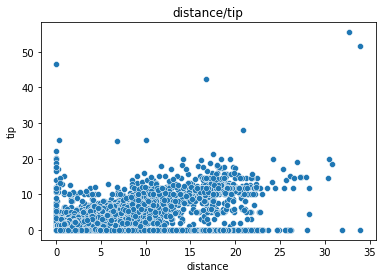

In [93]:
#분석 6. 팁이 높아질수록 주행거리도 멀어지는가
sns.scatterplot(data=df3, x='trip_distance', y='tip_amount')
plt.title('distance/tip')
plt.xlabel('distance')
plt.ylabel('tip')
plt.show()

#분석 5을 통해 주행거리가 멀어질 수록 팁 금액이 높아짐

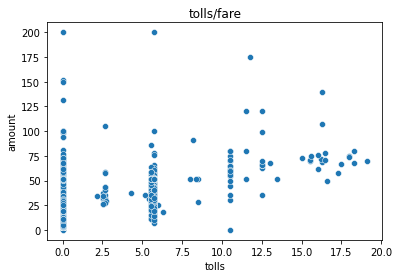

In [94]:
#분석 7. 톨게이트 비용이 높아질수록 요금도 높아지는가
sns.scatterplot(data=df3, x='tolls_amount', y='fare_amount')
plt.title('tolls/fare')
plt.xlabel('tolls')
plt.ylabel('amount')
plt.show()

#톨게이트 비용이 증가할수록 요금도 증가한다
#택시요금에 톨게이트 비용도 포함되지 때문이다

#보통은 톨게이트 비용이 0원인 경우가 많다
# 톨게이트 비용=5.0에 집중되어 있는데 많이 지나는 톨게이트 구간일 것이다

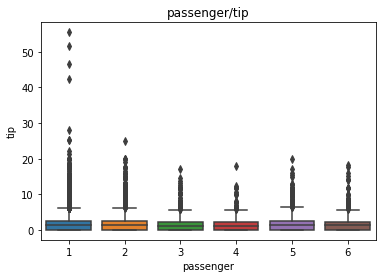

In [96]:
#분석 8. 승객 수가 많이질수록 팁도 높아지는가
sns.boxplot(data=df3, x='passenger_count', y='tip_amount')
plt.title('passenger/tip')
plt.xlabel('passenger')
plt.ylabel('tip')
plt.show()

#승객 수가 많다고 해서 팁도 증가하지는 않는다
#분석 5를 참고했을 때 둘 간의 상관관계는 매우 낮다

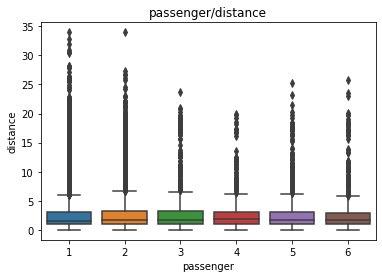

In [97]:
#분석 9. 숭객 수가 많을수록 주행 거리도 멀어지는가
sns.boxplot(data=df3, x='passenger_count', y='trip_distance')
plt.title('passenger/distance')
plt.xlabel('passenger')
plt.ylabel('distance')
plt.show()

#승객 수와 주행거리는 비례하지 않는다
#승객이 4명일 떄보다 5, 6명인 경우, 주행 거리는 높이지지만 분석 5를 참고했을때
#둘은 큰 상관관계를 보이지 않는다

In [98]:
#분석 10. 결제 수단에 따른 통계
num10 = df3.groupby('payment_method').agg(
    운행횟수=('passenger_count', 'count'),
    평균요금=('fare_amount', 'mean'),
    평균팁=('tip_amount', 'mean')
)
print(num10)

#서로 유사하다
#평균 요금은 카드가 비교적 높다

                 운행횟수       평균요금       평균팁
payment_method                            
Card            11473  13.021268  1.830086
Cash            11169  12.933186  1.825695


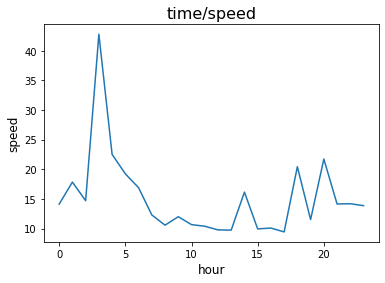

In [109]:
#분석 11. 주행시간을 통해 차가 가장 막히는 시간
df3['tpep_pickup_datetime'] = pd.to_datetime(df3['tpep_pickup_datetime'])
df3['tpep_dropoff_datetime'] = pd.to_datetime(df3['tpep_dropoff_datetime'])

#주행시간 = 하차시간-승차시간
df3['trip_duration'] = (df3['tpep_dropoff_datetime'] - df3['tpep_pickup_datetime']).dt.total_seconds() / 60

#음수 제외
df3= df3[(df3['trip_duration'] > 0)]


df3['avg_speed_kmh'] = df3['trip_distance'] / (df3['trip_duration'] / 60)

df3.groupby('pickup_hour')['avg_speed_kmh'].mean().plot(kind='line')
plt.title('time/speed', fontsize=16)
plt.xlabel('hour', fontsize=12)
plt.ylabel('speed', fontsize=12)
plt.show()


#05시 이전이 가장 차가 막히지 않는다
#점심시간 대가 가장 차가 막힌다

#한가지 의문은.. 단위가 km가 맞는지 명시되어 있지 않다
#마일이면 변환 필요

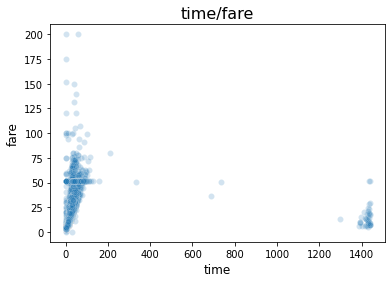

In [112]:
#분석 12. 주행시간이 길어질수록 요금이 높아지는지
sns.scatterplot(data=df3, x='trip_duration', y='fare_amount', alpha=0.2)
plt.title('time/fare', fontsize=16)
plt.xlabel('time', fontsize=12)
plt.ylabel('fare', fontsize=12)
plt.show()

#주행시간(분)
#우상향 > 주행시간이 길어질수록 요금이 높다진다
#하지만 이상치가 아니라고 간과한 데이터가 1400분(약 24시간)인데 요금이 낮은 경우 발생
#따라서 이러한 경우에는 추가적인 이상치 처리 필요하다